<a href="https://colab.research.google.com/github/sayan0506/Facial-Key-Points-Detection-using-Neural-Network-/blob/master/Facial_landmark_detction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split

**Drive mount**

The dataset is in Emotion AI folder in drive.

In [2]:
# Dataframe creation for the facial keypoints
facial_keypoints = pd.read_csv('/content/drive/My Drive/Emotional AI/KeyFacialPoints.csv')

In [3]:
print('Dataframe info:')
facial_keypoints.info()

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 

In [4]:
print('Facial keypoints dataframe visualization: \n')
facial_keypoints.head(3)

Facial keypoints dataframe visualization: 



,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...


* The dataframe consists of 2140 samples of images, where each row of the dataframe consists of 30 different facial keypoints along with the image at the 31st column.
* All the pixel values of image are stored together as a string in the **'Image'** column corresponding to each of the datapoint.

In [5]:
# Let's go through the image imfo stored for a single datapoint
print('Images info corresponding to the 1st datapoint: ',facial_keypoints['Image'][0])

Images info corresponding to the 1st datapoint:  238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 

* Each of the image if corresponding to 96*96 pixels, stored in string format under the'Image' column in the dataframe.
* The user-defined function is used to extract the image info from strings and convert each string to (96,96) numpy array. 
* Each of the images stored are single channels of size (96,96).

In [6]:
# String to np.ndarray conversion
facial_keypoints['Image'] = facial_keypoints['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape(96,96))

In [7]:
print('Individual reshaped image shape: ',facial_keypoints['Image'][0].shape)

Individual reshaped image shape:  (96, 96)


# Missing Value Check

Checking whether any missing data is there in the dataframe corresonding to any datapoint.

In [8]:
if sum(facial_keypoints.isnull().sum()) == 0:
  print('No missing data is there.')
else:
  print('Missing values are there!')

No missing data is there.


In [9]:
print('Attribute-wise summary of all the datapoints:')
facial_keypoints.describe()

Attribute-wise summary of all the datapoints:


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,40.050971,50.002113,67.752000,40.293408,94.269957,48.823425,51.300571,39.445859,39.676082,44.857962,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


# Images Visualization

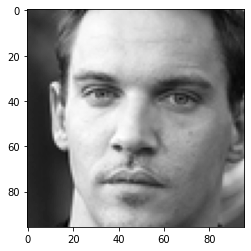

In [10]:
# Let's plot a random image from the dataset.
i = np.random.randint(1, len(facial_keypoints))
plt.imshow(facial_keypoints['Image'][i], cmap = 'gray')

* Facial keypoints are plotted on the dynamic number(Here 16) of random images using ***plot_random_images()*** function.
* Gray scale images are plotted first.
* Facial keypoints are then plotted on it, thus 30 keypoints corresponding to 15 features are plotted here.
* Each keypoint has coordinate (x,y), represented by consecuetive two attributes in the dataframe.


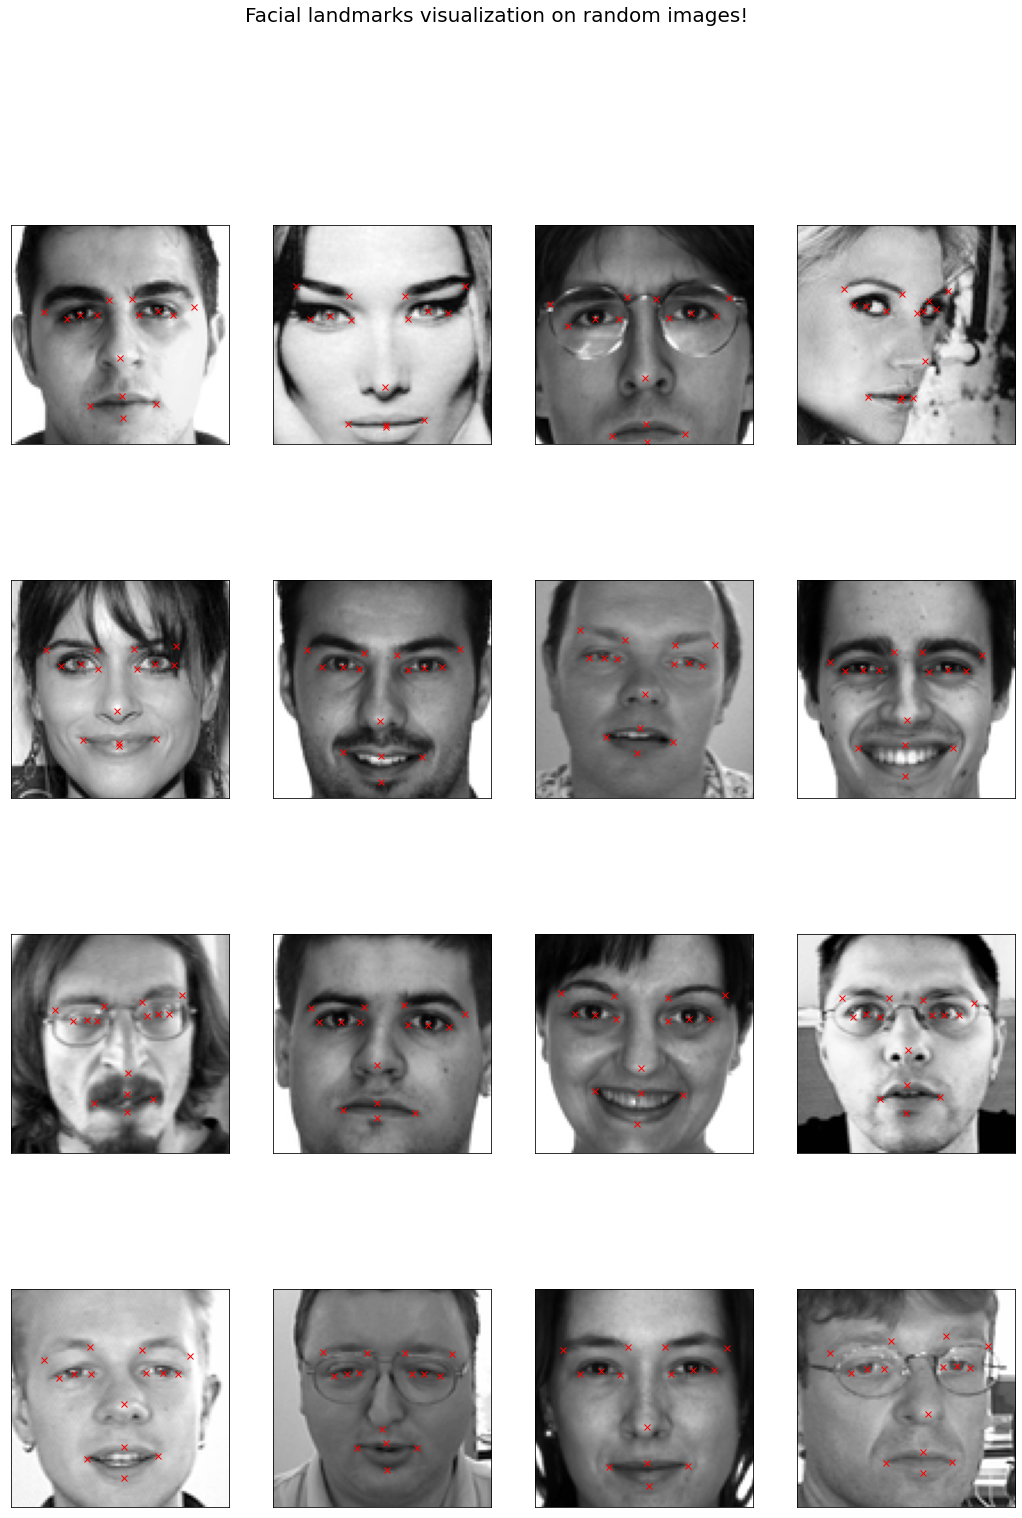

In [11]:
# Visualizing the random image with facialkeypoints on it

# Pyplot figure is created

def plot_random_images(img_count):
  fig = plt.figure(figsize = (18,25))
  fig.suptitle('Facial landmarks visualization on random images!',fontsize = 20)
  for c in range(img_count):
    i = np.random.randint(1, len(facial_keypoints))
    fig.add_subplot(int(np.sqrt(img_count)),int(np.sqrt(img_count)),c+1)
    # gray scale images are plotted first
    plt.imshow(facial_keypoints['Image'][i],cmap='gray')
    # facial keypoints are then plotted on it, thus 30 keypoints corresponding to 15 features are plotted here
    # Each keypoint has coordinate (x,y), represented by consecuetive two attributes in the dataframe 
    for j in range(1,len(facial_keypoints.columns),2):
      plt.plot(facial_keypoints.loc[i][j-1],facial_keypoints.loc[i][j],'rx')
      plt.xticks([])
      plt.yticks([])
  plt.show()

# Plot 16 random images, whatever the count of images we want to visualize, that can be passed to that function.
plot_random_images(16)

# Data Augmentation

In [12]:
facial_keypoints_copy = facial_keypoints.copy()

In [13]:
# Extracting features of the keypoints

columns = facial_keypoints_copy.columns[:-1]
print('Features of keypoints:\n',columns)

Features of keypoints:
 Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')


Now, Image Augmentation techniques will be implmented, two following techniques are used:
* **Horizontal flip of images.**

* **Brightness enhancement of the images.**

**Note:** After implementing the image augmentation, like the **Horizontal Flip**, the facial keypoints are needed to be adjusted or flipped accordingly. 

Horizontal Fliiping is implemented here.

In [14]:
# Horizontal Fliiping is implemented here.
facial_keypoints_copy['Image'] = facial_keypoints_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

Effect of Image Augmentaion Augmentation:


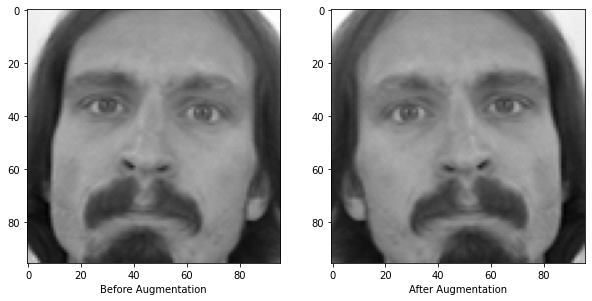

In [15]:
print('Effect of Image Augmentaion Augmentation:')
fig_aug = plt.figure(figsize=(10,10))
fig_aug.add_subplot(1,2,1)
plt.imshow(facial_keypoints['Image'][0],cmap='gray')
plt.xlabel('Before Augmentation')
fig_aug.add_subplot(1,2,2)
plt.imshow(facial_keypoints_copy['Image'][0],cmap='gray')
plt.xlabel('After Augmentation')
plt.show()

* Here, the facial keypoints are adjusted to fit the augmented image.
* As the images are flipped horizontally, so we need to adust the landmarks corresponding to X-axis only.

***Adjustment=>   adjusted_value = (96 - initial_value)*** 

Here, 96 is the image resolution along the x-axis.

In [16]:
# keypoints adjustment

for col,atr in enumerate(columns):
  if(col % 2 == 0):
    facial_keypoints_copy[atr] = facial_keypoints_copy[atr].apply(lambda x: 96. - float(x))


Effect of Image Augmentaion after keypoint adjustment:



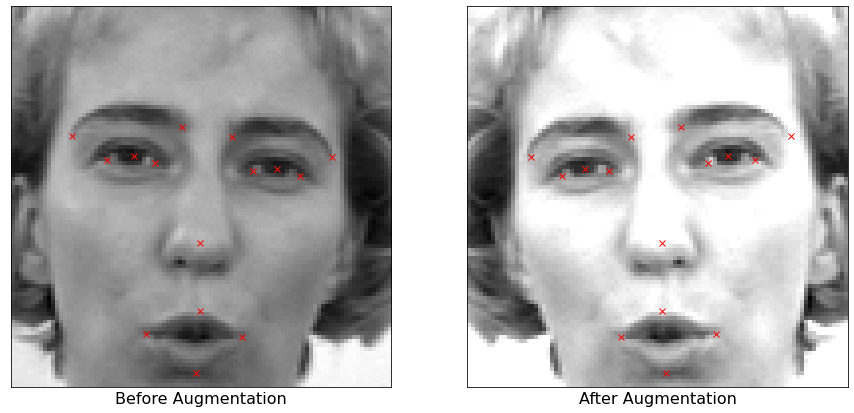

In [47]:
print('Effect of Image Augmentaion after keypoint adjustment:\n')
image_no  = np.random.randint(1, len(facial_keypoints))
aug_comp = plt.figure(figsize = (15,15))
for i_c, df in enumerate([facial_keypoints, facial_keypoints_copy]):
  aug_comp.add_subplot(1,2,i_c + 1)
  plt.imshow(df['Image'][image_no], cmap = 'gray')
  for j in range(1,len(df.columns),2):
      plt.plot(df.loc[image_no][j-1],df.loc[image_no][j],'rx')
      plt.xticks([])
      plt.yticks([])
      plt.xlabel('{0}'.format(['Before Augmentation', 'After Augmentation'][i_c]), fontsize = 16)
  
plt.show()


Brightness enhancement augmentation technique is implemented by multiplying each pixel of the image with a uniform random number betweeen 1 and 2, but restricting the enhanced pixel value within a range between 0 and 255

Effect of Image Augmentaion after brightness adjustment:



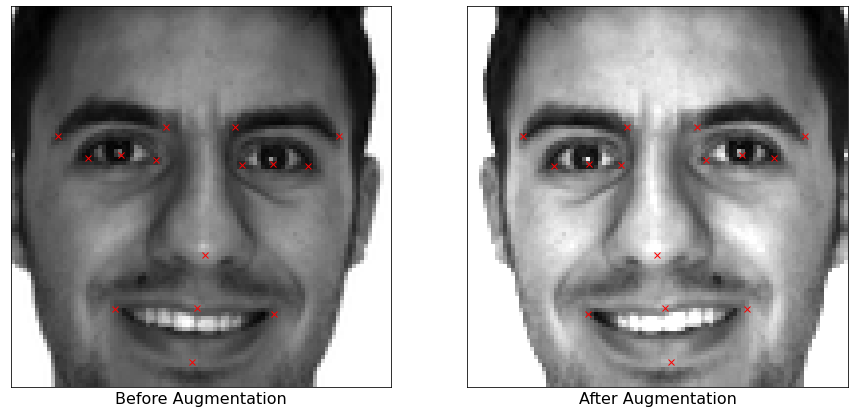

In [18]:
# random.uniform(1,2) returns uniform random number between 1 and 2, if uniform is not used, it would have returned biased value.
# np.clip() helps to restrict the multiplied value within the range between 0 and 255. 
facial_keypoints_copy['Image'] = facial_keypoints_copy['Image'].apply(lambda x: np.clip(x * random.uniform(1,2), 0, 255)) 

print('Effect of Image Augmentaion after brightness adjustment:\n')
image_no  = np.random.randint(1, len(facial_keypoints))
aug_comp = plt.figure(figsize = (15,15))
for i_c, df in enumerate([facial_keypoints, facial_keypoints_copy]):
  aug_comp.add_subplot(1,2,i_c + 1)
  plt.imshow(df['Image'][image_no], cmap = 'gray')
  for j in range(1,len(df.columns),2):
      plt.plot(df.loc[image_no][j-1],df.loc[image_no][j],'rx')
      plt.xticks([])
      plt.yticks([])
      plt.xlabel('{0}'.format(['Before Augmentation', 'After Augmentation'][i_c]), fontsize = 16)
  
plt.show()


After implementing image Augmentations, both the dataframes are concatenated to make a larger dataframe of many samples.

In [19]:
# Both the dataframes are passed as a tuple (df1, df2) to the np.concatenate() function

facial_keypoints_augmentation = np.concatenate((facial_keypoints, facial_keypoints_copy))
print('Shape of concatenated dataframe: ',facial_keypoints_augmentation.shape)

Shape of concatenated dataframe:  (4280, 31)


# Images normalization, data preperation for training

Images are normalized, and x_train, y_train, x_test, y_test are preperated from the concatenated dataframe for training using train_test_split.

Images are only stored as numpy array after normalization.

In [50]:
# The images are first stored in a list using list comprehension
# The list is then converted into a numpy array with a data-type of float32 
# Then the new axis is added to images array which correspond to the number of channel of image(axis = 3)
# Then the images are normalized(1./255.)
images = np.expand_dims(np.array([facial_keypoints_augmentation[i][30] for i in range(facial_keypoints_augmentation.shape[0])], dtype = np.float32), axis = 3)/255.
print('Image array shape: ', images.shape)

Image array shape:  (4280, 96, 96, 1)


The facial keypoints corresponds to the final dataframe are stored in different numpy array named keypoints, which corresponds to 30 attributes for 15 different types of facial landmarks.   

In [56]:
# facial keypoints attributes are stored as a numpy array, where each elemnt is stored as float32 datatype.

keypoints = np.array([facial_keypoints_augmentation[i][:30] for i in range(facial_keypoints_augmentation.shape[0])], dtype = np.float32)
print('Shape of the keypoints array: ', keypoints.shape) 

Shape of the keypoints array:  (4280, 30)


Train test split => the dataset is split into 80 percent train data, 20 percent validation data(test).

In [59]:
x_train, x_valid, y_train, y_valid = train_test_split(images, keypoints, test_size = 0.2)

In [58]:
print('Training images shape: {0}\nTraining labels shape: {1}\nValidation images shape: {2}\nValidation labels shape: {3}\n'.format(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape))

Training images shape: (3424, 96, 96, 1)
Training labels shape: (856, 96, 96, 1)
Validation images shape: (3424, 30)
Validation labels shape: (856, 30)



# Building the Convolution Neural Network(CNN)

In this project **RESNET(Residual Network)** is used which incorporates the concept of **'Skip Connection'**, which helps in removing the error due to *'Vanishing gradient'* while implementing a Deep CNN. 